## Downloading the dataset and performing data preprocessing

In [1]:
!wget2 -q --no-clobber https://github.com/SoumadipDey/datasets/raw/main/Metro_Interstate_Traffic_Volume.csv

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Loading the dataset into a pandas DataFrame

In [3]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.shape

(48204, 9)

Checking for NAN values and Imputing if needed

In [5]:
df.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [6]:
df = df.fillna({"holiday":"No Holiday"})
df.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

Checking Datatypes and Performing Feature Engineering if needed

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [8]:
df['date_time']= pd.to_datetime(df['date_time'],format='mixed')
df['day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
df.drop('date_time',axis=1,inplace = True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,month,year,hour
0,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,Tuesday,10,2012,9
1,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,4516,Tuesday,10,2012,10
2,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,Tuesday,10,2012,11
3,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,Tuesday,10,2012,12
4,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,4918,Tuesday,10,2012,13


Seperating the Features and the Target

In [9]:
X_df = df.drop(['traffic_volume'], axis = 1)
y_df = df[['traffic_volume']]

Converting Categorical Features into Numerical Features using Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
categorical = ['holiday', 'weather_main', 'weather_description','day']
for feature in categorical:
    X_df[feature] = LabelEncoder().fit_transform(X_df[feature])

X_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,7,288.28,0.0,0.0,40,1,24,5,10,2012,9
1,7,289.36,0.0,0.0,75,1,2,5,10,2012,10
2,7,289.58,0.0,0.0,90,1,19,5,10,2012,11
3,7,290.13,0.0,0.0,90,1,19,5,10,2012,12
4,7,291.14,0.0,0.0,75,1,2,5,10,2012,13
...,...,...,...,...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,75,1,2,3,9,2018,19
48200,7,282.76,0.0,0.0,90,1,19,3,9,2018,20
48201,7,282.73,0.0,0.0,90,10,21,3,9,2018,21
48202,7,282.09,0.0,0.0,90,1,19,3,9,2018,22


Splitting into a Training and Validation Dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3 , random_state=42)

In [12]:
X_train.shape, X_test.shape

((33742, 11), (14462, 11))

Building and Training a Decision Tree Regressor Model

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Evaluating the performance of the Decision Tree Regressor Model with MSE, MAE and $R^2$ Score.

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training Performance:")
print("MSE: ",mean_squared_error(y_train, y_pred_train))
print("MAE: ",mean_absolute_error(y_train, y_pred_train))
print("R2: ",r2_score(y_train, y_pred_train))

print("\nValidation Performance:")
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("R2: ",r2_score(y_test, y_pred))

Training Performance:
MSE:  206986.69779332628
MAE:  259.97047298851527
R2:  0.9474005333349015

Validation Performance:
MSE:  238302.30399068978
MAE:  279.93613813394825
R2:  0.9400712711237347


Checking the Closeness of the Actual values with the predicted values

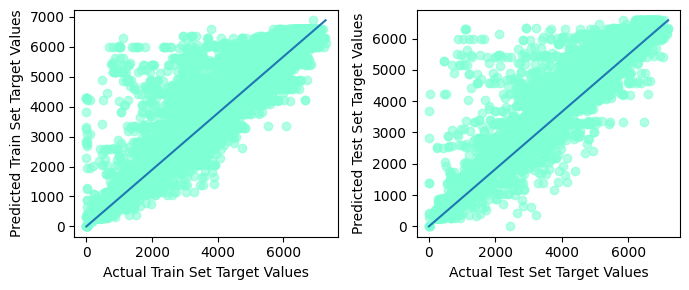

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(7,3))
plt.sca(ax[0])
plt.scatter(x=y_train, y = y_pred_train, c = 'aquamarine', alpha=0.6)
sns.lineplot(x=[np.min(y_train),np.max(y_train)],
             y=[np.min(y_pred_train),np.max(y_pred_train)])
plt.xlabel("Actual Train Set Target Values")
plt.ylabel("Predicted Train Set Target Values")
plt.sca(ax[1])
plt.scatter(x=y_test, y=y_pred, c = 'aquamarine', alpha=0.6)
sns.lineplot(x=[np.min(y_test),np.max(y_test)],
             y=[np.min(y_pred),np.max(y_pred)])
plt.xlabel("Actual Test Set Target Values")
plt.ylabel("Predicted Test Set Target Values")
fig.tight_layout()
plt.show()

Plotting the Decision Tree Regressor

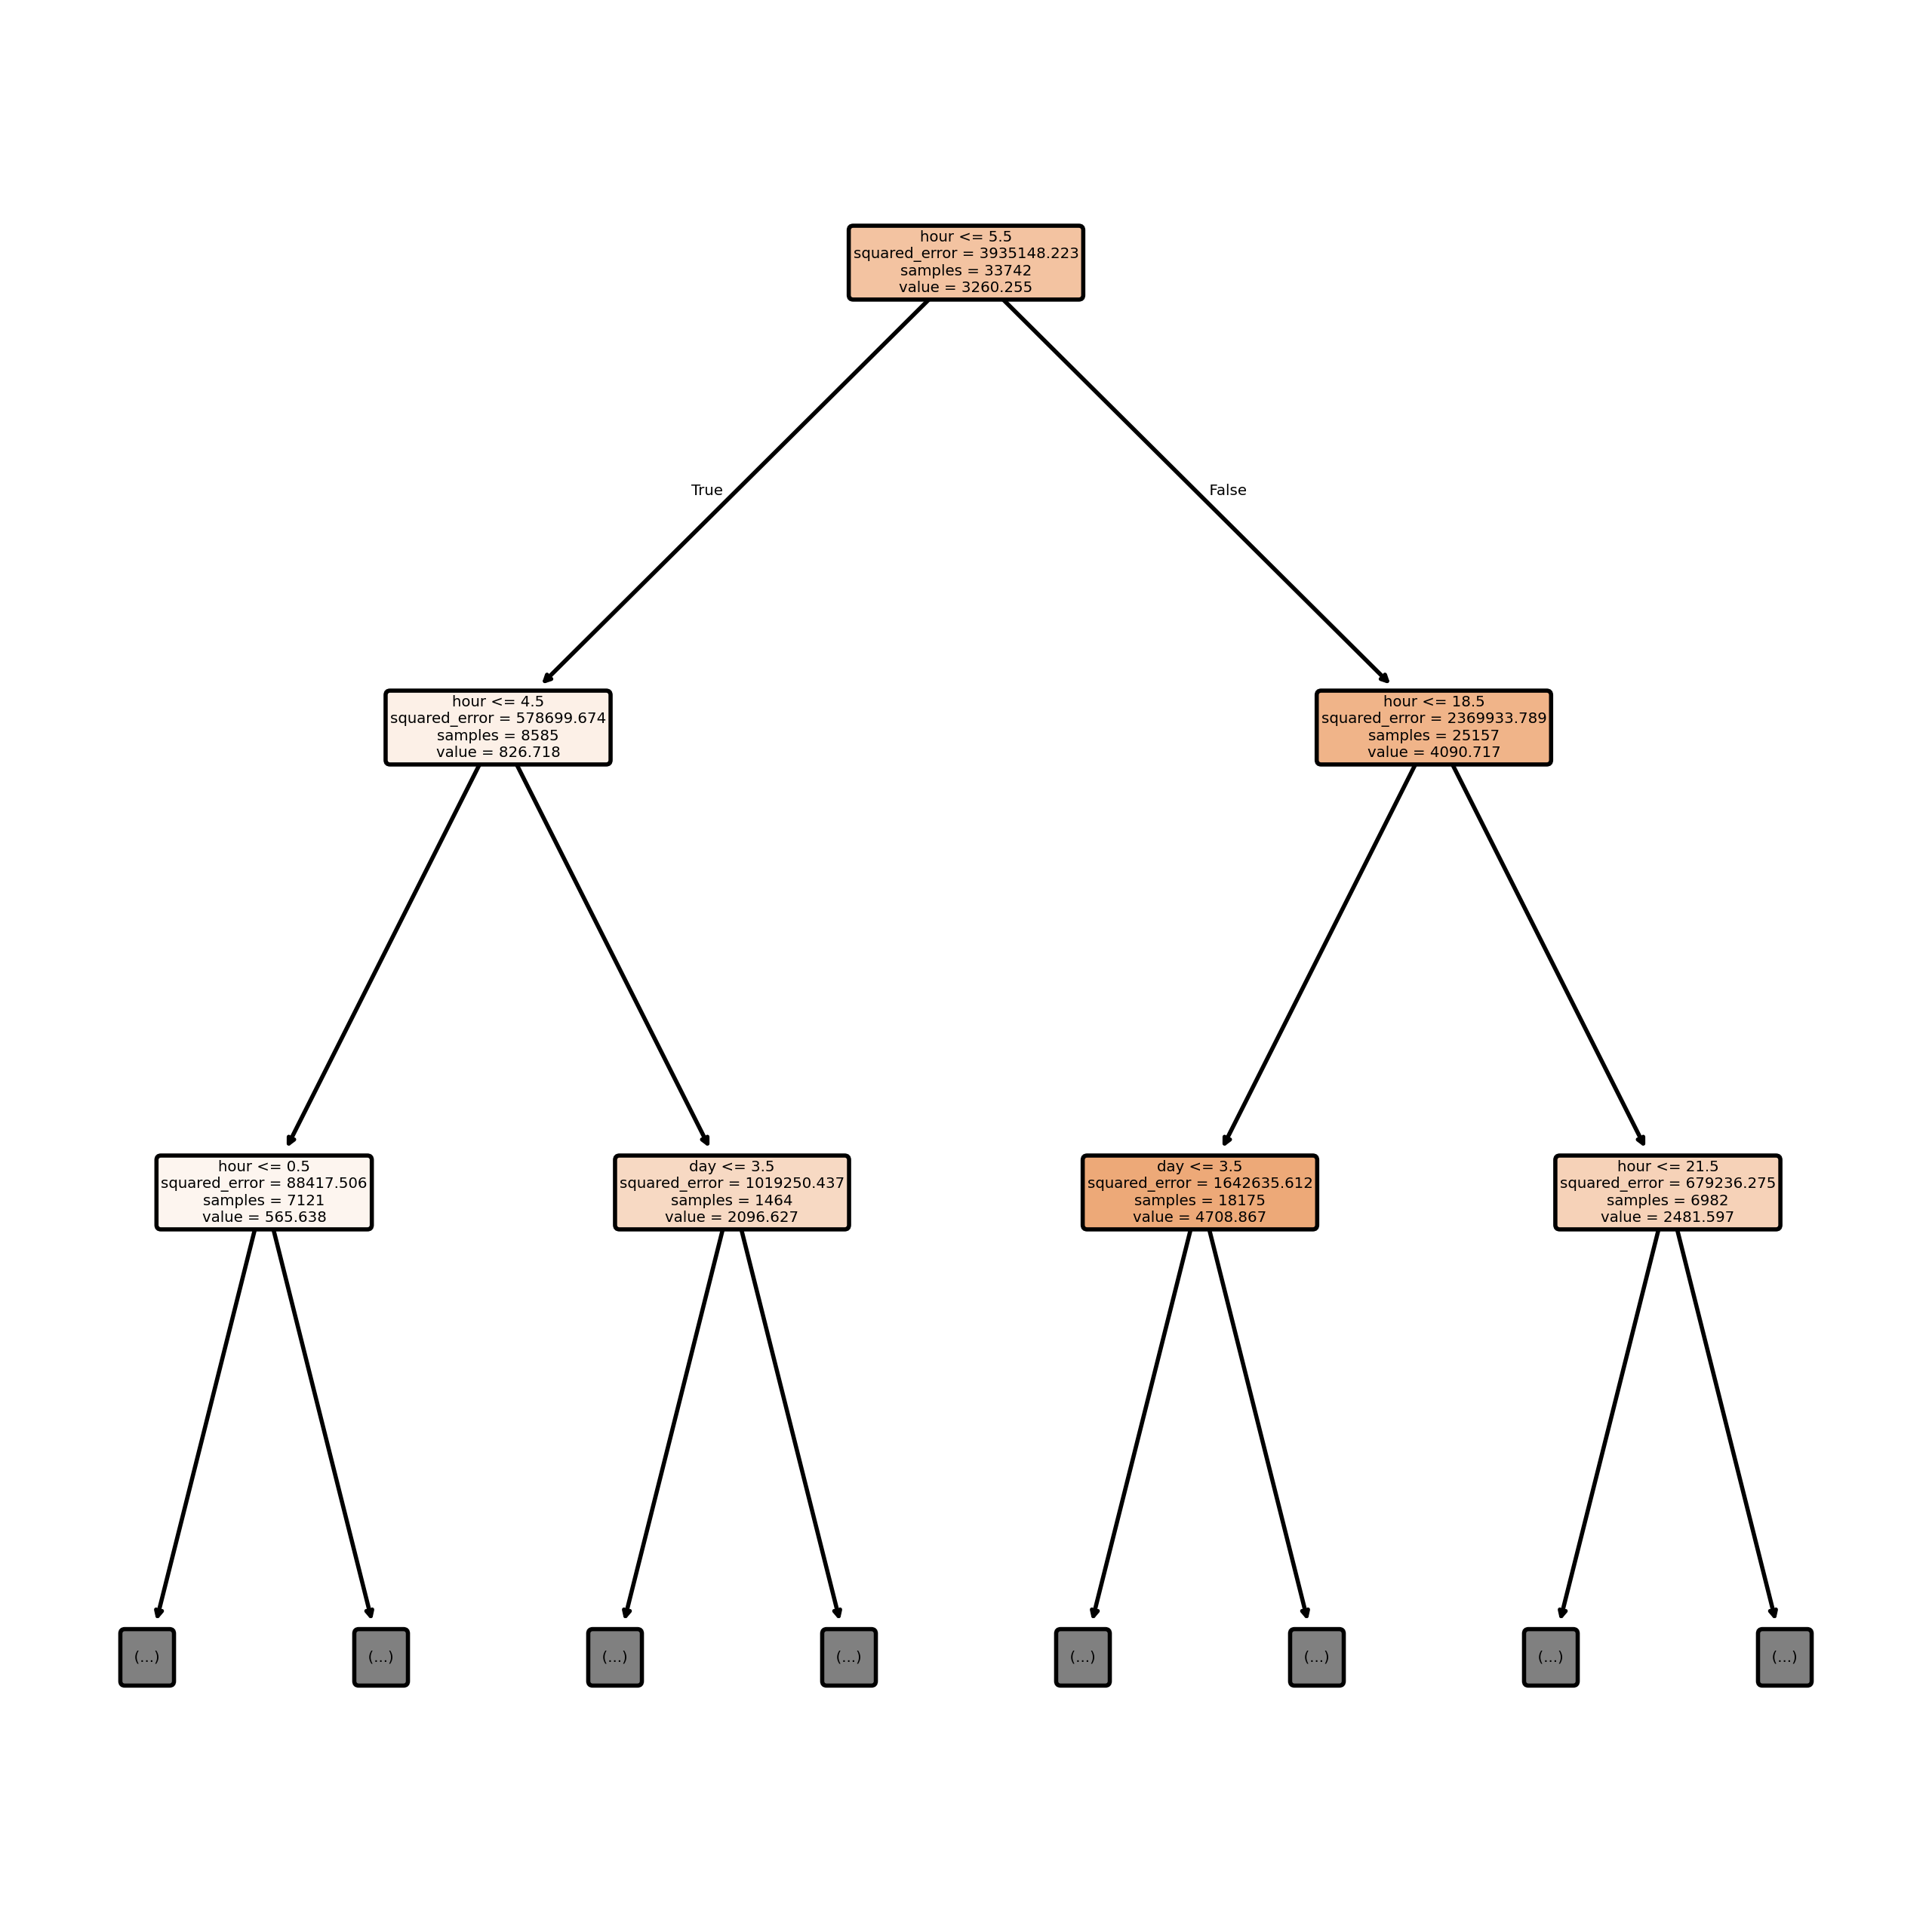

In [16]:
from sklearn.tree import plot_tree

plt.figure(1,(8,8), dpi=400)
tree = plot_tree(model, max_depth=2, feature_names = model.feature_names_in_, rounded=True, filled=True)
plt.savefig("Decision Tree Metro Interstate Traffic.png", dpi = 300)
plt.show()